In [1]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient as numgrad
import time

In [2]:
class Simple:
    
    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        layer_1 = sigmoid(np.dot(x, W1) + b1)
        layer_2 = softmax(np.dot(layer_1, W2) + b2)
        
        output = layer_2
        
        return output
    
    def loss(self, x, t):
        y = self.predict(x)
        
        lossfunc = cross_entropy_error(y, t)
        
        return lossfunc
    
    def grad(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numgrad(loss_W, self.params['W1'])
        grads['W2'] = numgrad(loss_W, self.params['W2'])
        grads['b1'] = numgrad(loss_W, self.params['b1'])
        grads['b2'] = numgrad(loss_W, self.params['b2'])
        
        return grads

In [3]:
import numpy as np
from dataset.mnist import load_mnist as load

In [4]:
(x_tr, t_tr), (x_te, t_te) = load()

train_loss = []

In [5]:
iters_num = 1000
train_size = x_tr.shape[0]
batch_size = 30
learning_rate = 0.1

In [6]:
net = Simple(input_size = 784, hidden_size = 50, output_size = 10)

In [7]:
now = time.time()

for i in range(iters_num):
    slicing = np.random.choice(train_size, batch_size)
    x_batch = x_tr[slicing]
    t_batch = t_tr[slicing]
    
    gradient = net.grad(x_batch, t_batch)
    
    for key in ['W1', 'W2', 'b1', 'b2']:
        net.params[key] -= learning_rate * gradient[key]
        
    loss = net.loss(x_batch, t_batch)
    train_loss.append(loss)
    
    elapsed_time = (time.time()-now)//1
    second = elapsed_time%60
    minute = elapsed_time//60%60
    hour = elapsed_time//3600
    
    print('calc {0}% done. elapsed : {1:.0f}h {2:.0f}m {3:.0f}s'.format((i+1)*100/iters_num,hour, minute, second), end = '\r')
    


In [8]:
import pickle
with open('common/param_dict.pkl', 'wb') as f:
    pickle.dump(net.params, f)

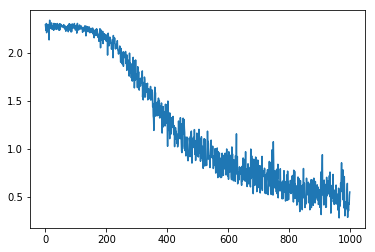

In [10]:
import matplotlib.pyplot as plt

plt.plot(range(iters_num), train_loss)
plt.show()